In [1]:
%matplotlib inline

In [2]:
from collections import Counter
from types import MethodType
from typing import Tuple

import numpy as np
import torch
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F

from env import GameEnv
from rewards import Reward1
from trainer import Trainer
from networks import DQN

In [3]:
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

In [4]:
env = GameEnv(reward_class=Reward1)

In [5]:
def get_state(self: Trainer):
    with np.errstate(divide='ignore'):
        board = np.where(self.env.board != 0, np.log2(self.env.board), 0)
        return torch.from_numpy(np.ascontiguousarray(board)).unsqueeze(0).float().to(self.device)


def state2(self: Trainer):
    with np.errstate(divide='ignore'):
        board = np.where(env.board != 0, np.log2(env.board).astype(np.int), 0)
    board = np.vectorize(np.binary_repr)(board, width=4).astype(str)
    board = np.array([list(''.join(line)) for line in board]).astype(np.int)
    return torch.from_numpy(np.ascontiguousarray(board)).unsqueeze(0).float().to(self.device)

In [6]:
# define constants
num_episodes = 1000
BATCH_SIZE = 256
GAMMA = 0.999
EPS_START = 1.
EPS_END = 0.1
EPS_DECAY = 9999
TARGET_UPDATE = 50
MEMORY_SIZE = 10000
optimizer = optim.Adam
optimizer_params = {"lr": 0.0001}

In [7]:
log_dir="runs/run1"

In [8]:
trainer = Trainer(memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, gamma=GAMMA, eps_start=EPS_START, eps_end=EPS_END,
                  eps_decay=EPS_DECAY, target_update=TARGET_UPDATE, env=env, model=DQN, optimizer_klass=optimizer,
                  optimizer_params=optimizer_params,
                  loss_f=F.smooth_l1_loss, is_ipython=is_ipython, log_dir=log_dir)

# assign state method
trainer.get_state = MethodType(state2, trainer)

cuda


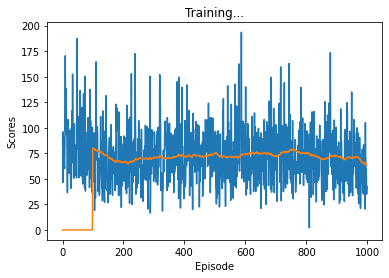

In [9]:
# train
trainer.train(num_episodes)

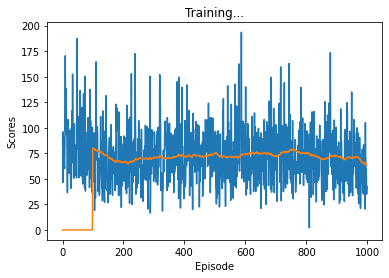

In [10]:
trainer.write_results()